# Q5.   
The attached dataset (grade5.csv) contains data on class size, average math and verbal test scores for 2,019 5th grade classes in 1,002 public schools in Israel, as well as enrollment in each school and percentage disadvantaged pupils. (Each school has one or more 5th grade classes.)  

In Israel, schools face a rule which states that classes cannot be larger than 40 pupils. When enrollment is 41, schools are supposed to open a second classroom, and then open a third classroom at 81 pupils etc. This causes discontinuous drops in class size at multiples of 40, while pupils are more or less evenly distributed between the multiple classes.


In [134]:
my_data = read.csv("hw2-5_grade.csv") 
# names(my_data)
drops <- c("X")
my_data=my_data[ , !(names(my_data) %in% drops)]
head(my_data)

schlcode,enrollment,classize,avgmath,avgverb,disadv
11005,54,28,74.11,70.5700,24
11005,54,26,71.11,75.0000,24
11006,37,22,64.00,75.4700,38
11006,37,15,50.00,60.6475,38
11009,32,32,68.38,73.9700,6
11010,68,34,59.86,69.5500,3


    schlcode       enrollment        classize        avgmath     
 Min.   :11005   Min.   :  8.00   Min.   : 8.00   Min.   :27.69  
 1st Qu.:31037   1st Qu.: 50.00   1st Qu.:26.00   1st Qu.:61.11  
 Median :41214   Median : 72.00   Median :31.00   Median :67.80  
 Mean   :39638   Mean   : 77.74   Mean   :29.94   Mean   :67.29  
 3rd Qu.:51206   3rd Qu.:100.00   3rd Qu.:35.00   3rd Qu.:74.09  
 Max.   :61365   Max.   :226.00   Max.   :44.00   Max.   :93.93  
                                                  NA's   :1      
    avgverb          disadv    
 Min.   :34.80   Min.   : 0.0  
 1st Qu.:69.86   1st Qu.: 4.0  
 Median :75.41   Median :10.0  
 Mean   :74.39   Mean   :14.1  
 3rd Qu.:79.84   3rd Qu.:19.5  
 Max.   :93.86   Max.   :76.0  
                               

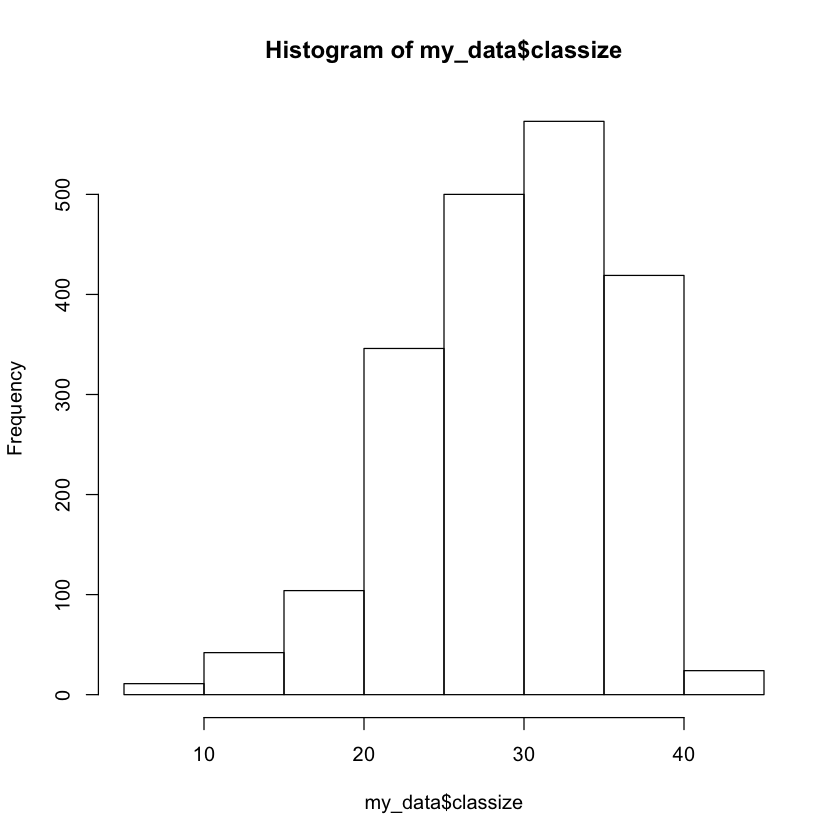

In [135]:
summary(my_data)
hist(my_data$classize)

# hist(my_data$enrollment)
# 40, 80, 120, 160, 200 (max 226)

In [136]:
head(my_data[my_data$classize>40,] )
# in fact we still have outliers of exceeding 40 (40-45)
summary(my_data[my_data$classize>40,] )

,schlcode,enrollment,classize,avgmath,avgverb,disadv
102,11170,67,43,74.25,85.19,2
105,11171,74,41,63.49,69.85,8
113,11184,81,41,74.71,78.89,5
252,21094,80,41,58.38,75.05,3
481,31022,134,41,65.05,79.44,7
819,41089,97,42,65.50,69.75,18


    schlcode       enrollment        classize       avgmath     
 Min.   :11170   Min.   : 36.00   Min.   :41.0   Min.   :53.74  
 1st Qu.:41089   1st Qu.: 73.75   1st Qu.:41.0   1st Qu.:63.64  
 Median :41442   Median : 81.50   Median :41.0   Median :68.34  
 Mean   :42455   Mean   : 86.67   Mean   :41.5   Mean   :69.89  
 3rd Qu.:51326   3rd Qu.:119.00   3rd Qu.:42.0   3rd Qu.:75.56  
 Max.   :61190   Max.   :134.00   Max.   :44.0   Max.   :85.91  
    avgverb          disadv     
 Min.   :58.03   Min.   : 0.00  
 1st Qu.:69.83   1st Qu.: 3.00  
 Median :77.47   Median : 7.00  
 Mean   :75.84   Mean   :10.42  
 3rd Qu.:81.96   3rd Qu.:13.50  
 Max.   :89.27   Max.   :44.00  

# (a)   
Use OLS to regress math scores on class size without any controls and then again by adding the percentage of disadvantaged students in the class and school enrollment as controls. Interpret your results: what does this analysis suggest about the effect of class size on math scores?

In [137]:
lmodel1 <- lm(avgmath ~ classize, data = my_data)
summary(lmodel1)


Call:
lm(formula = avgmath ~ classize, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.335  -6.041   0.357   6.579  27.584 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 57.66021    0.97703   59.02   <2e-16 ***
classize     0.32171    0.03188   10.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.367 on 2016 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.04808,	Adjusted R-squared:  0.04761 
F-statistic: 101.8 on 1 and 2016 DF,  p-value: < 2.2e-16


Interpretation:  
The bigger the class size is, the better the math scores will be.

In [138]:
lmodel2 <- lm(avgmath ~ classize+disadv, data = my_data)
summary(lmodel2)


Call:
lm(formula = avgmath ~ classize + disadv, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.5963  -5.6205   0.1853   5.9938  29.6261 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 69.81244    1.01492  68.786   <2e-16 ***
classize     0.07583    0.03027   2.505   0.0123 *  
disadv      -0.33953    0.01467 -23.148   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.327 on 2015 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.248,	Adjusted R-squared:  0.2473 
F-statistic: 332.3 on 2 and 2015 DF,  p-value: < 2.2e-16


Interpretation:  
The bigger the class size is, the better the math scores will be. The higher the disadvantage student percentage is, the worse the scores will be.

In [139]:
lmodel3 <- lm(avgmath ~ classize+disadv+enrollment, data = my_data)
summary(lmodel3)


Call:
lm(formula = avgmath ~ classize + disadv + enrollment, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.4094  -5.5894   0.1003   5.9490  29.7707 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 70.085372   1.018056  68.842  < 2e-16 ***
classize     0.018535   0.036646   0.506  0.61306    
disadv      -0.331671   0.014917 -22.234  < 2e-16 ***
enrollment   0.017121   0.006196   2.763  0.00578 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.313 on 2014 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2509,	Adjusted R-squared:  0.2498 
F-statistic: 224.8 on 3 and 2014 DF,  p-value: < 2.2e-16


**Interpretation: ** 
After adding disadv and enrollment as controls, we see that he classsize is not longer a significant factor influcing maths scores. Here we may guess, the different in maths scores were caused by different covariates, which means that the effect of class size "being a significant factor" as we saw before might have only been caused by factors other than class size ifself.

# (b) 
Limit the sample to schools with enrollments between 20 and 60 students. Explain how one could use a regression discontinuity to assess the effect of class size on math scores. Discuss the validity of the design.

- Enrollment as **instrumental variables**.
- Classsize as **treatment**.
- Scors as the **effect** to be analyzed.    

Discontinuity occurs around enrollment at multiples of 40 but we still have **overlap** around the cutoff - classize being 40-43 around the cut-off, so that the design is valid.

,schlcode,enrollment,classize,avgmath,avgverb,disadv
1,11005,54,28,74.11,70.5700,24
2,11005,54,26,71.11,75.0000,24
3,11006,37,22,64.00,75.4700,38
4,11006,37,15,50.00,60.6475,38
5,11009,32,32,68.38,73.9700,6
19,11021,58,30,57.86,72.6400,11


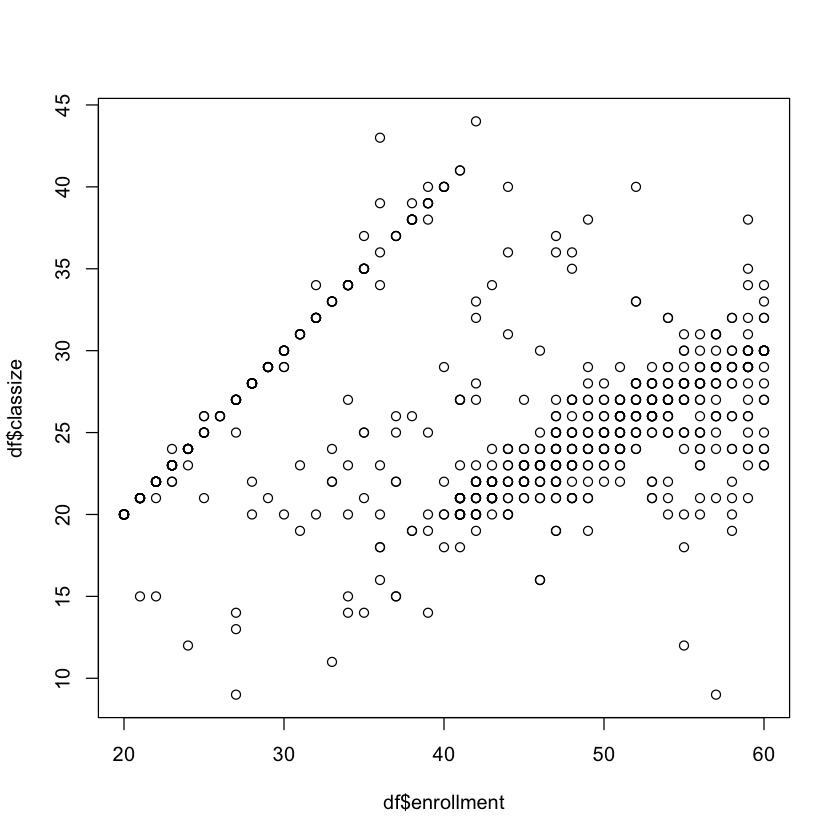

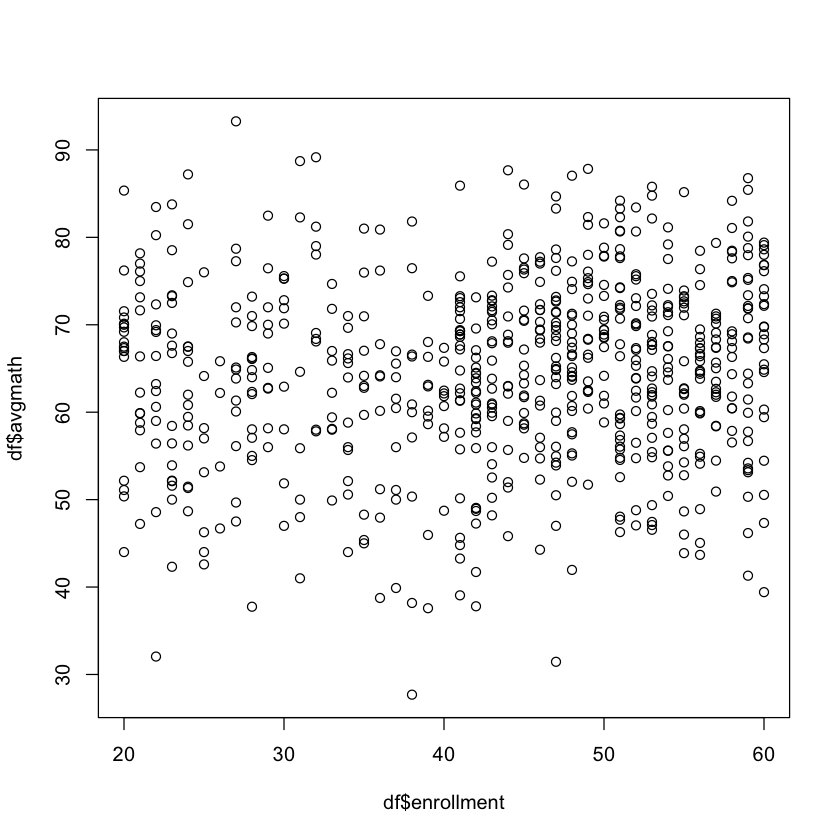

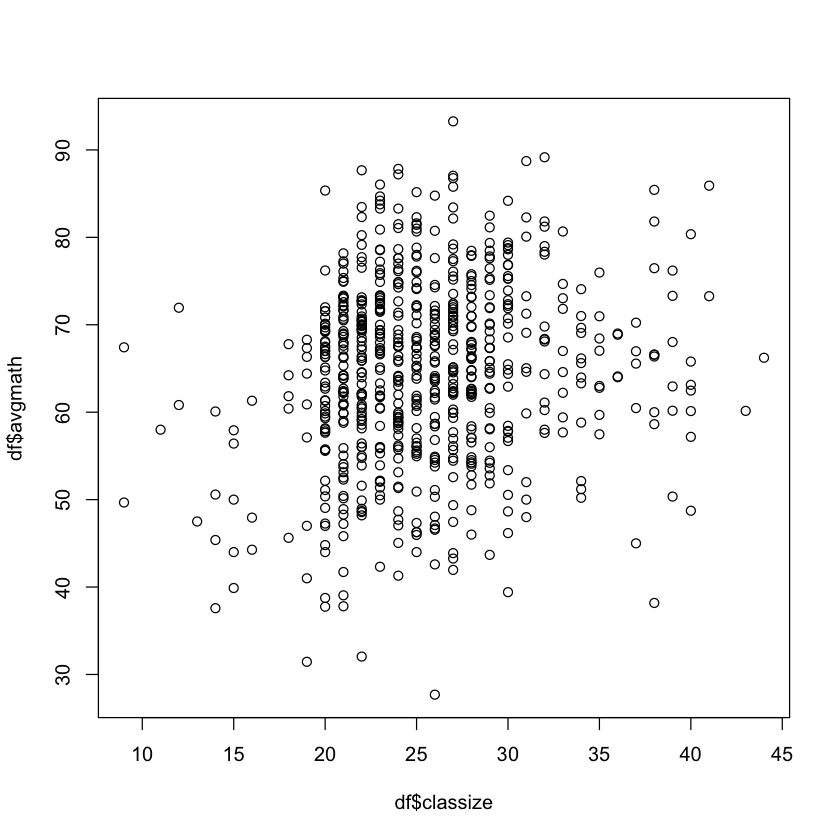

In [140]:
df<-my_data[my_data$enrollment>=20 & my_data$enrollment<=60,]
head(df)
# summary(df)
# hist(df$classize)
plot(df$enrollment,df$classize)
plot(df$enrollment,df$avgmath)
plot(df$classize,df$avgmath)

# (c) 
Use a sharp RDD with OLS to estimate the effect of being in a large class on math scores. Now do the same but also control for the percentage of disadvantaged students in the class. Report confidence intervals, interpret your results, compare to the first part, and explain any differences.

$Y=\alpha  + \tau I(X>40) +\epsilon $  

or

$Y=\alpha + \beta X + \tau I(X>40) +\epsilon $  




In [141]:
data=df
data$cut=as.integer(as.logical(data$enrollment>40))
head(data)
str(data)

,schlcode,enrollment,classize,avgmath,avgverb,disadv,cut
1,11005,54,28,74.11,70.5700,24,1
2,11005,54,26,71.11,75.0000,24,1
3,11006,37,22,64.00,75.4700,38,0
4,11006,37,15,50.00,60.6475,38,0
5,11009,32,32,68.38,73.9700,6,0
19,11021,58,30,57.86,72.6400,11,1


'data.frame':	699 obs. of  7 variables:
 $ schlcode  : int  11005 11005 11006 11006 11009 11021 11021 11031 11031 11034 ...
 $ enrollment: int  54 54 37 37 32 58 58 42 42 56 ...
 $ classize  : int  28 26 22 15 32 30 28 23 19 28 ...
 $ avgmath   : num  74.1 71.1 64 50 68.4 ...
 $ avgverb   : num  70.6 75 75.5 60.6 74 ...
 $ disadv    : int  24 24 38 38 6 11 11 12 12 11 ...
 $ cut       : int  1 1 0 0 0 1 1 1 1 1 ...


In [142]:
my_data=data
sharprdd <- lm(avgmath ~ cut+disadv, data = my_data)
summary(sharprdd)
confint(sharprdd)


Call:
lm(formula = avgmath ~ cut + disadv, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.5305  -5.5942   0.1286   5.9404  24.2220 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 70.39489    0.71428  98.554   <2e-16 ***
cut          1.59288    0.69749   2.284   0.0227 *  
disadv      -0.33673    0.01943 -17.328   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.653 on 696 degrees of freedom
Multiple R-squared:  0.3111,	Adjusted R-squared:  0.3091 
F-statistic: 157.2 on 2 and 696 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),68.9924928,71.7972903
cut,0.2234475,2.9623163
disadv,-0.3748790,-0.2985717


In [143]:
# my_data=data
# sharprdd <- lm(avgmath ~ cut+disadv+enrollment, data = my_data)
# summary(sharprdd)
# confint(sharprdd)

# # non-significant

**Interpretation**  
If enrollment is bigger than 40 then there is a discontious drop in classize, so this result tells us the bigger the class is (>40), the worse the socre will be. It remains the same that more diadvantaged students, the lower the score will be.  
This result is more valid and meaning than previous continous versions regardless of discontinuity (we see previously that the classzise turned to non-significant taking no consideration of discontinuity)


# (d) 
Now use local linear regression (loess in R) and use bootstrap for confidence intervals. Assess the validity of this model vs linear and interpret the results.


Refer to: http://r-statistics.co/Loess-Regression-With-R.html & http://rstudio-pubs-static.s3.amazonaws.com/167126_11381f0877a74d2a90ac717153b9541b.html

Without disadv, we do the local on enrollment. If should capture some local pattern (discontinuity), but the result is not good.

Call:
loess(formula = avgmath ~ enrollment, data = my_data, span = 0.25)

Number of Observations: 699 
Equivalent Number of Parameters: 11.76 
Residual Standard Error: 10.21 
Trace of smoother matrix: 13  (exact)

Control settings:
  span     :  0.25 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 

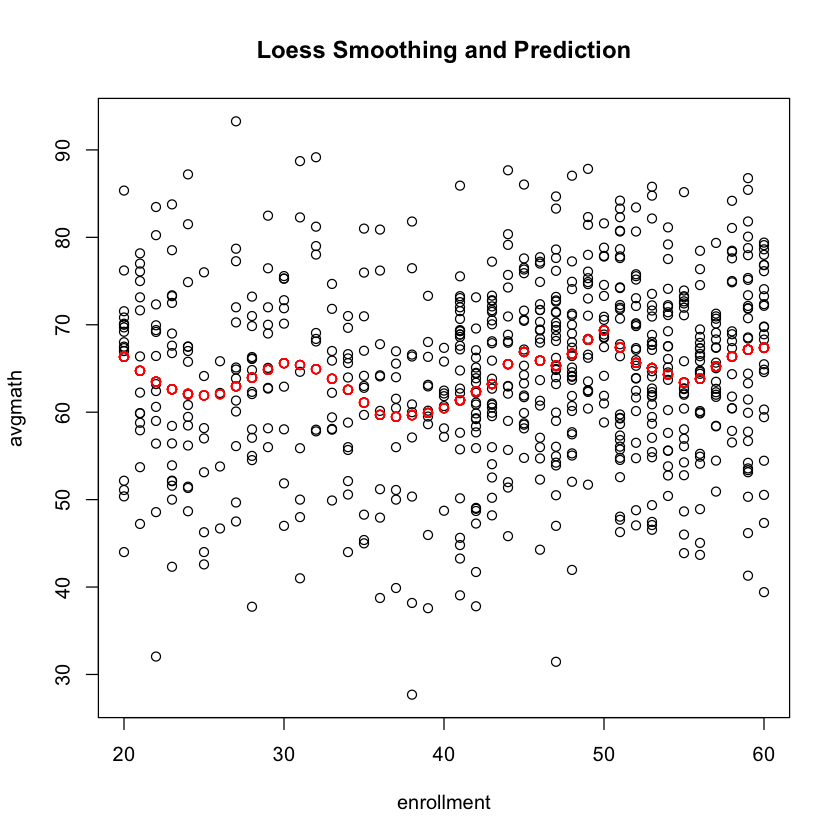

In [144]:
loessMod25 <- loess(avgmath ~ enrollment, data=my_data, span=0.25) # 25% smoothing span

summary(loessMod25)
smoothed25 <- predict(loessMod25) 

plot(y=my_data$avgmath, x=my_data$enrollment,  main="Loess Smoothing and Prediction", xlab="enrollment", 
     ylab="avgmath")

points(smoothed25, x=my_data$enrollment, col="red")

local linear regression - **span**
the smaller the span is, the more overfitting/local it will be 

In [145]:
# loessMod25 <- loess(avgmath ~ enrollment, data=my_data, span=0.05) # 25% smoothing span

# summary(loessMod25)
# smoothed25 <- predict(loessMod25) 

# plot(y=my_data$avgmath, x=my_data$enrollment,  main="Loess Smoothing and Prediction", xlab="enrollment", 
#      ylab="avgmath")

# points(smoothed25, x=my_data$enrollment, col="red")

In [146]:
# plot(my_data$enrollment, my_data$avgmath, pch = 20, col = "black", xlab = "enrollment",
#      ylab = "avgmath", main = "loess")
# lines(my_data$enrollment, loess(avgmath ~ enrollment, my_data, span=0.15)$fitted, lwd = 3,
#       col = "tomato")

In [147]:
# loessMod25 <- loess(avgmath ~ enrollment+disadv, data=my_data, span=0.25) # 25% smoothing span

# summary(loessMod25)
# smoothed25 <- predict(loessMod25) 

# plot(y=my_data$avgmath, x=my_data$enrollment,  main="Loess Smoothing and Prediction", xlab="enrollment", 
#      ylab="avgmath")

# points(smoothed25, x=my_data$enrollment, col="red")

Bootstrap for CI

In [148]:
boot_fn <- function(data, indices) 
{
        d <- data[indices, ]
        d <- d[order(d$enrollment),]
        loess_fit <- loess(avgmath ~ enrollment, d,
                           control = loess.control(surface = "direct"))
        predict(loess_fit, data.frame(enrollment = seq(min(d$enrollment), max(d$enrollment, 1))), se = T)$fit
}

library(boot)
loess_boot <- boot(my_data, R = 100, statistic = boot_fn)

          Length Class      Mode     
t0          41   -none-     numeric  
t         4100   -none-     numeric  
R            1   -none-     numeric  
data         7   data.frame list     
seed       626   -none-     numeric  
statistic    1   -none-     function 
sim          1   -none-     character
call         4   -none-     call     
stype        1   -none-     character
strata     699   -none-     numeric  
weights    699   -none-     numeric  

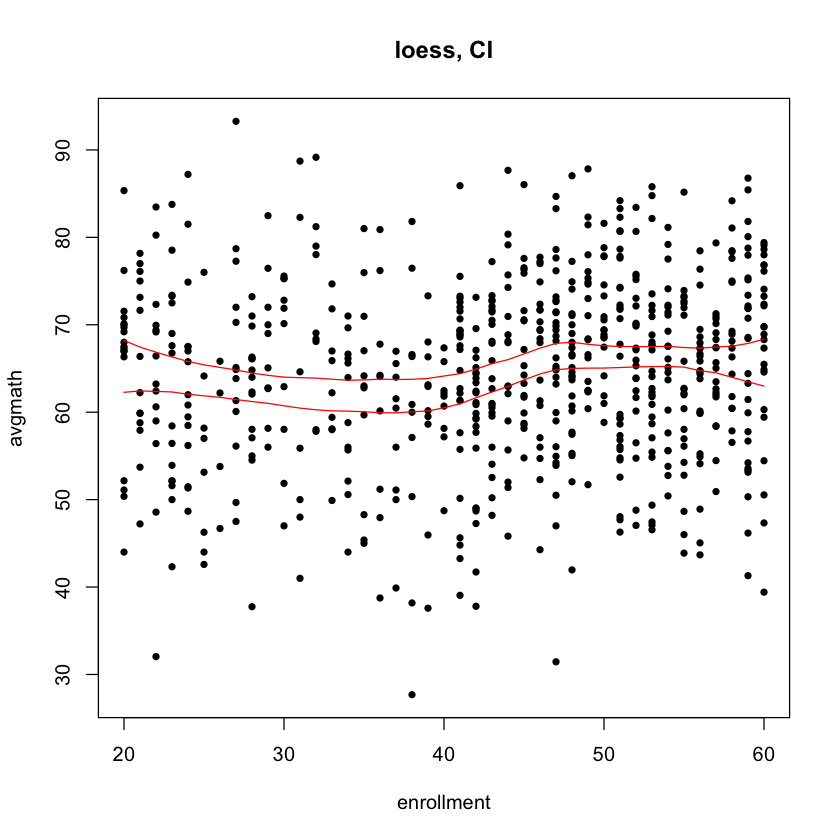

In [149]:

summary(loess_boot)

plot(my_data$enrollment, my_data$avgmath, pch = 20, col = "black", xlab = "enrollment",
     ylab = "avgmath", main = "loess, CI")

conf_97.5 <- apply(loess_boot$t, 2, function(x) quantile(x, .975))
conf_2.5 <- apply(loess_boot$t, 2, function(x) quantile(x, .025))

    
d=my_data 
lines(seq(min(d$enrollment), max(d$enrollment, 1)), conf_97.5, type ="l",
      col = "red")
lines(seq(min(d$enrollment), max(d$enrollment, 1)), conf_2.5, type ="l",
      col = "red")

    
# lines(my_data$enrollment, loess(avgmath ~ enrollment, my_data, span=0.15)$fitted, lwd = 3,
#       col = "tomato")

# (e) 
Repeat the last two steps using a fuzzy RDD. Discuss the relevance of sharp vs fuzzy in this dataset as well as the defensibility of the assumptions needed of either RDD to be valid in this dataset.


For fuzzy RDD, we do wald estimator: 
- Enrollment as **instrumental variables**.
- Classsize as **treatment**.
- Scors as the **effect** to be analyzed.  


There are two ways to do the estimation of proportion around cut-off, here we need to decide this with data distribution.  
1) Use fixed amount of data points / range (i.e., enrolllment from 35-40. 40-45) around cut off  
2) logistics regression

Here we use the first for simplexity.

*Use >=40 for classize, rathar than >40 to have more data points. Also discontinuity happens at enrolmnet >40 which will result in classize <40 (the opposit is clasize>=40)*

In [150]:
data=df
data$cut=as.integer(as.logical(data$classize>=40))
head(data)
str(data)

,schlcode,enrollment,classize,avgmath,avgverb,disadv,cut
1,11005,54,28,74.11,70.5700,24,0
2,11005,54,26,71.11,75.0000,24,0
3,11006,37,22,64.00,75.4700,38,0
4,11006,37,15,50.00,60.6475,38,0
5,11009,32,32,68.38,73.9700,6,0
19,11021,58,30,57.86,72.6400,11,0


'data.frame':	699 obs. of  7 variables:
 $ schlcode  : int  11005 11005 11006 11006 11009 11021 11021 11031 11031 11034 ...
 $ enrollment: int  54 54 37 37 32 58 58 42 42 56 ...
 $ classize  : int  28 26 22 15 32 30 28 23 19 28 ...
 $ avgmath   : num  74.1 71.1 64 50 68.4 ...
 $ avgverb   : num  70.6 75 75.5 60.6 74 ...
 $ disadv    : int  24 24 38 38 6 11 11 12 12 11 ...
 $ cut       : int  0 0 0 0 0 0 0 0 0 0 ...


Check whether there is **overlap** so design can be valid:

**Problem**: Is the data size too small? around the cut-off

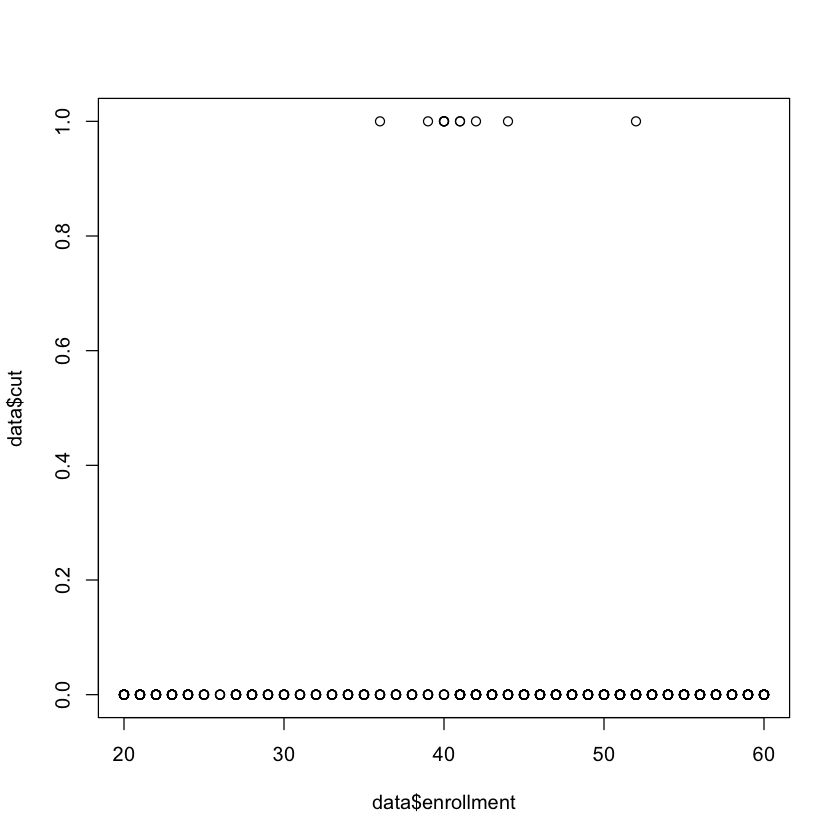

In [151]:
plot(data$enrollment,data$cut)

In [152]:
# nrow(data[data$cut==1,])
data[data$cut==1,]

,schlcode,enrollment,classize,avgmath,avgverb,disadv,cut
44,11064,40,40,48.73,52.77,25,1
164,11235,39,40,63.13,79.39,8,1
307,21162,52,40,60.13,64.00,22,1
514,31040,44,40,80.36,83.61,4,1
583,31101,40,40,57.18,60.18,50,1
607,31133,40,40,65.79,73.15,19,1
1260,41449,41,41,73.27,78.72,13,1
1568,51289,40,40,62.47,67.97,14,1
1635,51323,41,41,85.91,89.27,2,1
1804,61116,42,44,66.23,58.03,38,1


**Question:**
Is this reasonable: schlcode 61190, 11235, enrollment smaller than classize???
Or is this manually added for creating overlap?

**Choose range**:
Discontinuity occurs around enrollment at multiples of 40. We hope to have **overlap** around the cutoff, so we need to include the classize being 43 for that school with enrollment being (35-40], (40-45] as range around cut-off to do wald estimation.

Use <=40

In [153]:
data1=data[data$enrollment>35&data$enrollment<=40,]
data2=data[data$enrollment>40&data$enrollment<=45,]

Wald is estimated:

In [154]:
above=mean(data2$avgmath)-mean(data1$avgmath)
below=mean(data2$cut)-mean(data1$cut)
print("wald=")
print(above/below)

[1] "wald="
[1] -47.37357


Result: enrollment bigger than 40 results in lower scores????
I think this is due to small amount of data points....

In [ ]:

# logit1 <- glm(cut~ enrollment,family=binomial(link='logit'),data=my_data[my_data$enrollment<40])
# summary(logit1)

# logit2 <- glm(avgmath ~ cut+disadv,family=binomial(link='logit'),data=my_data[my_data$enrollment>40])